<a href="https://colab.research.google.com/github/Ayush06-coder/Machine-Learning-Project-on-Student-Prediction-Analysis/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files # To upload the file

# --- Scikit-learn (ML) Libraries ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# --- Set visualization styles ---
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# --- Set the file path ---
# This assumes you have already uploaded 'student-por.csv'
# to your Colab session using the "Files" tab on the left.
filename = "student-por.csv"

# You can add a check to see if the file exists
import os
if os.path.exists(filename):
    print(f"File found: {filename}")
else:
    print(f"Error: File not found at {filename}")
    print("Please upload the file using the 'Files' icon on the left.")

File found: student-por.csv


In [3]:
# --- Load and Inspect Data ---
df = pd.read_csv(filename)

print("--- First 5 Rows of Data ---")
print(df.head())

print("\n--- Data Info (Columns, Types, Nulls) ---")
df.info()

--- First 5 Rows of Data ---
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

--- Data Info (Columns, Types, Nulls) ---
<class 'pandas.c

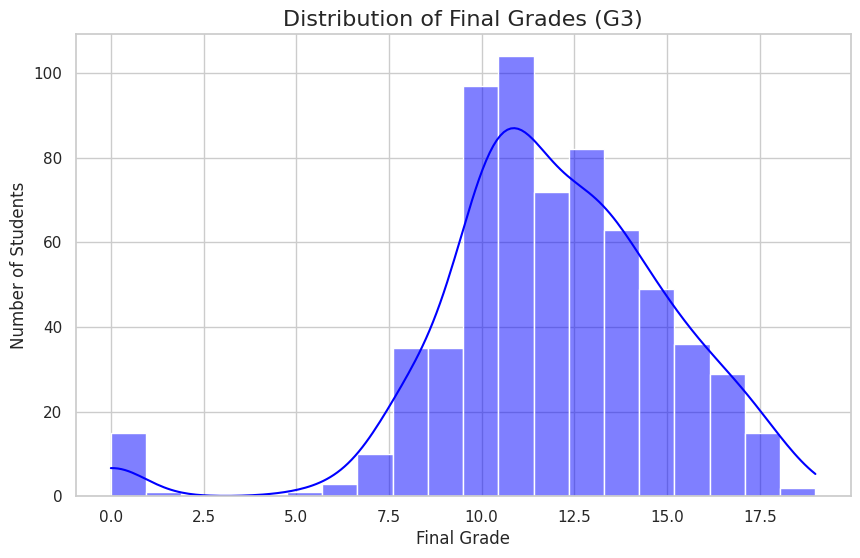

Note: We see a large number of students with a grade of 0.

--- Relationship between G1, G2, and G3 ---


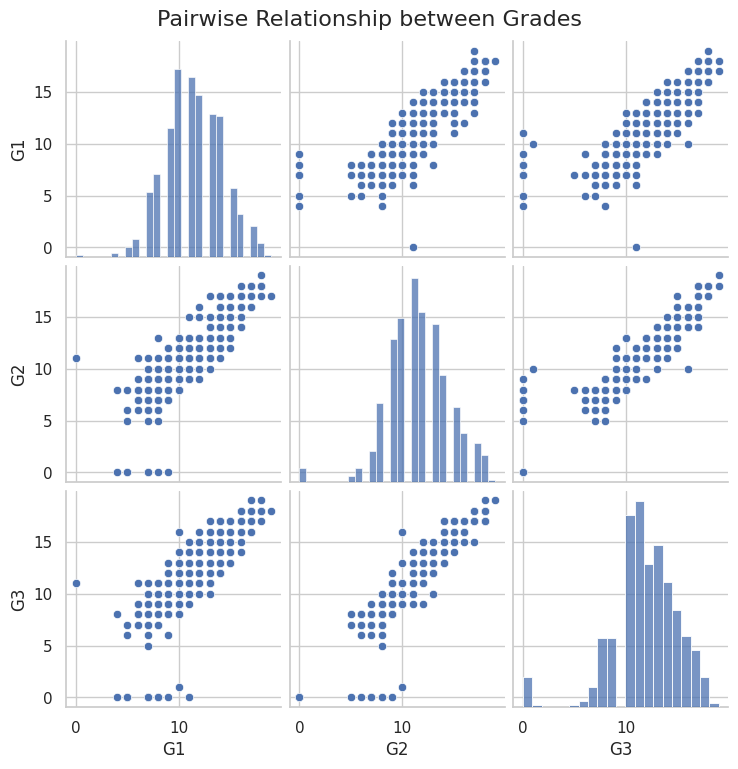

Observation: G1, G2, and G3 are very highly correlated. This is expected.


In [4]:
# --- 1. Distribution of our Target (G3) ---
sns.histplot(df['G3'], kde=True, bins=20, color='blue')
plt.title('Distribution of Final Grades (G3)', fontsize=16)
plt.xlabel('Final Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.show()
print("Note: We see a large number of students with a grade of 0.")

# --- 2. How G1, G2, and G3 relate ---
# This pairplot shows the strong linear relationship between the three grades
print("\n--- Relationship between G1, G2, and G3 ---")
sns.pairplot(df[['G1', 'G2', 'G3']])
plt.suptitle('Pairwise Relationship between Grades', y=1.02, fontsize=16)
plt.show()
print("Observation: G1, G2, and G3 are very highly correlated. This is expected.")

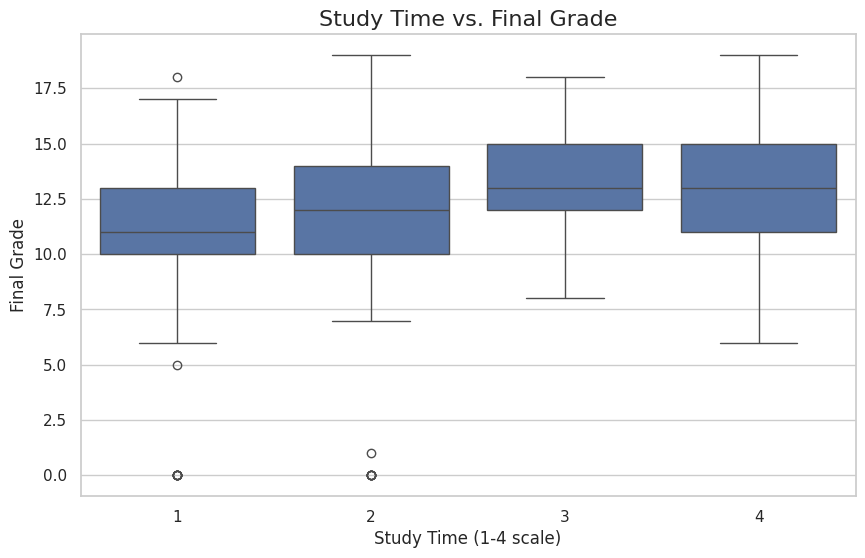

Observation: More study time generally leads to better (and more consistent) grades.


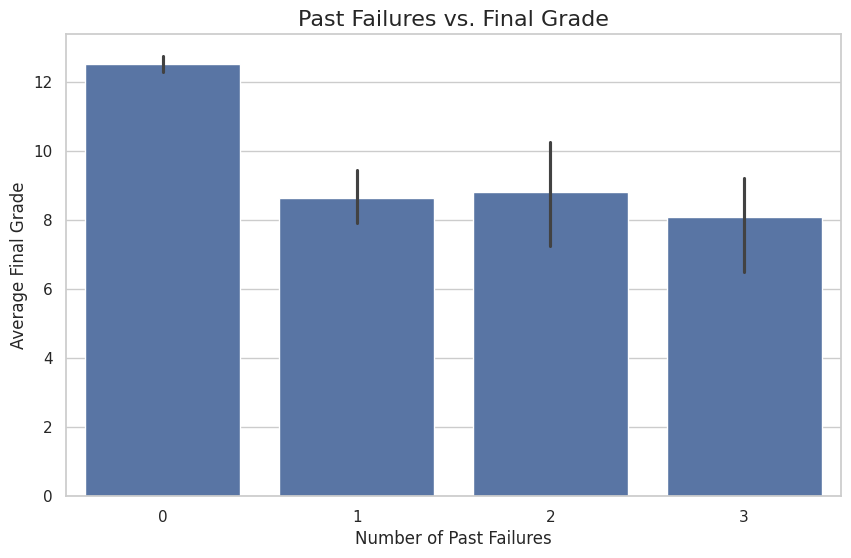

Observation: Past failures have a very strong negative impact on final grades.


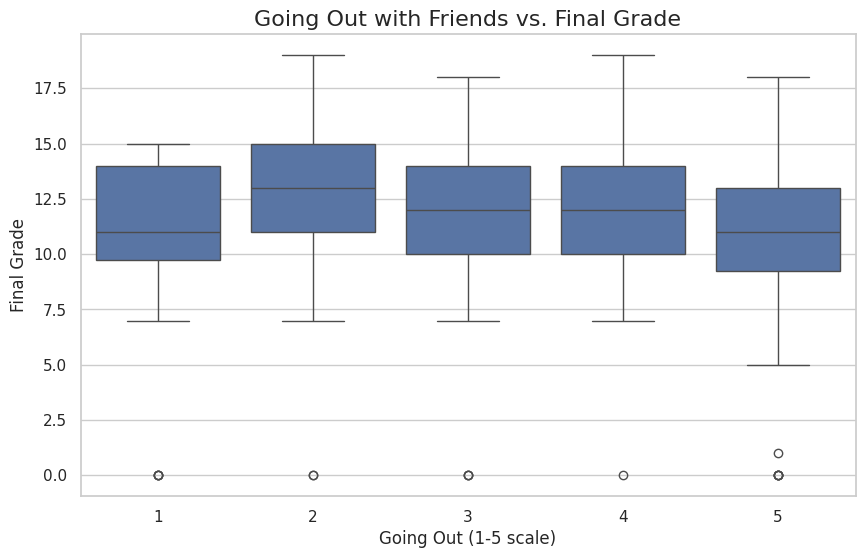

Observation: Students who go out less (1 or 2) tend to have higher grades.


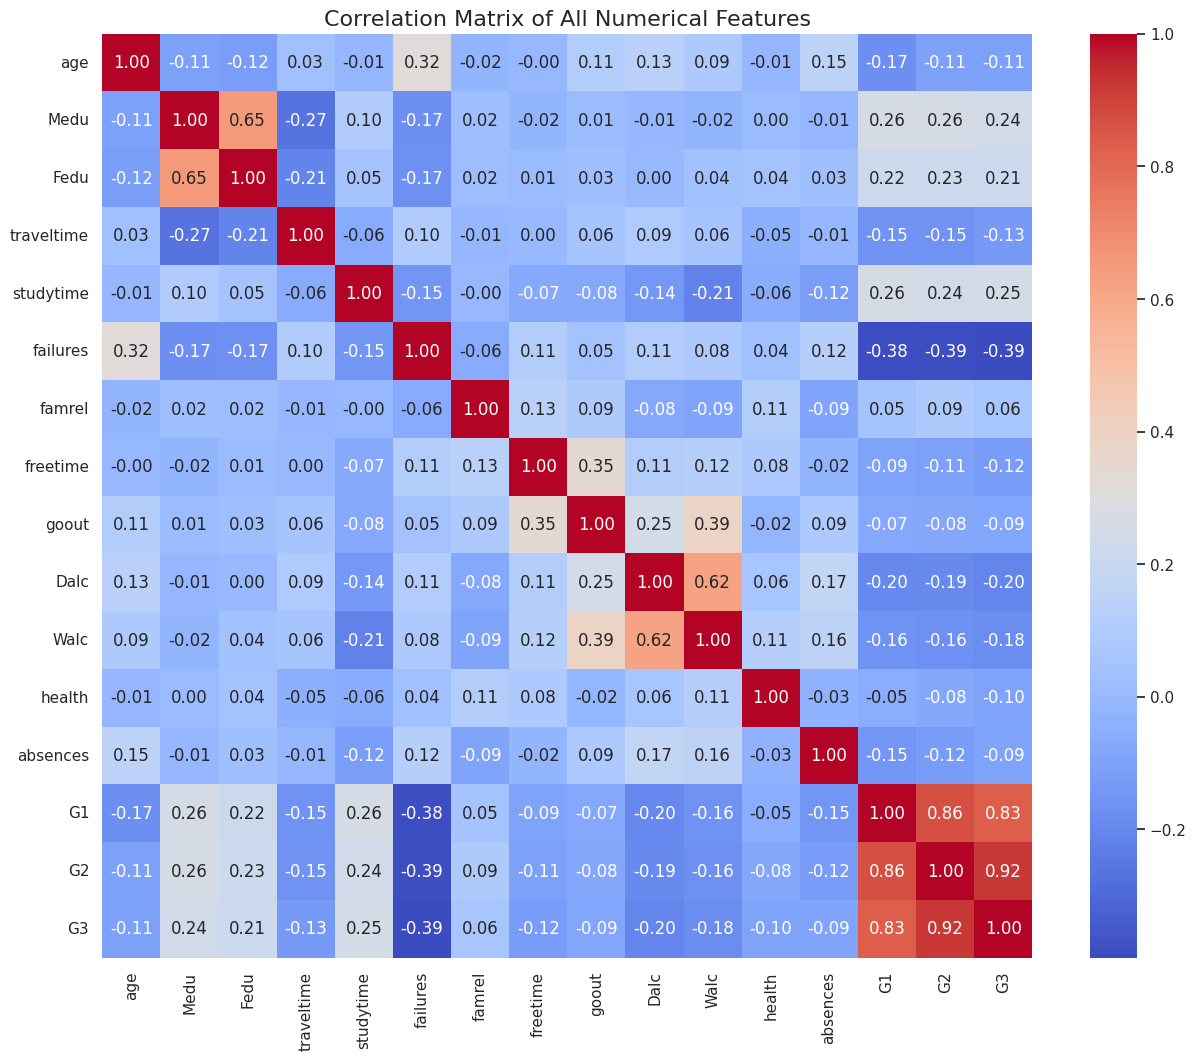

In [5]:
# --- 1. Study Time vs. Final Grade ---
# studytime: 1 = <2 hrs, 2 = 2-5 hrs, 3 = 5-10 hrs, 4 = >10 hrs
sns.boxplot(x='studytime', y='G3', data=df)
plt.title('Study Time vs. Final Grade', fontsize=16)
plt.xlabel('Study Time (1-4 scale)', fontsize=12)
plt.ylabel('Final Grade', fontsize=12)
plt.show()
print("Observation: More study time generally leads to better (and more consistent) grades.")

# --- 2. Past Failures vs. Final Grade ---
sns.barplot(x='failures', y='G3', data=df)
plt.title('Past Failures vs. Final Grade', fontsize=16)
plt.xlabel('Number of Past Failures', fontsize=12)
plt.ylabel('Average Final Grade', fontsize=12)
plt.show()
print("Observation: Past failures have a very strong negative impact on final grades.")

# --- 3. Going Out vs. Final Grade ---
# goout: 1 = Very Low, 5 = Very High
sns.boxplot(x='goout', y='G3', data=df)
plt.title('Going Out with Friends vs. Final Grade', fontsize=16)
plt.xlabel('Going Out (1-5 scale)', fontsize=12)
plt.ylabel('Final Grade', fontsize=12)
plt.show()
print("Observation: Students who go out less (1 or 2) tend to have higher grades.")

# --- 4. Correlation Heatmap (All Numerical Features) ---
plt.figure(figsize=(15, 12))
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of All Numerical Features', fontsize=16)
plt.show()

In [6]:
# --- Get a copy to process ---
df_processed = df.copy()

# --- Identify all 'object' (text) columns ---
categorical_cols = df_processed.select_dtypes(include=['object']).columns

print(f"Categorical columns to encode: {list(categorical_cols)}")

# --- Apply One-Hot Encoding ---
# This creates new columns (e.g., internet_yes, internet_no) with 1s and 0s
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print(f"\nData shape before encoding: {df.shape}")
print(f"Data shape after encoding: {df_processed.shape}")

print("\n--- Head of Processed Data ---")
print(df_processed.head())

Categorical columns to encode: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Data shape before encoding: (649, 33)
Data shape after encoding: (649, 42)

--- Head of Processed Data ---
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         0       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False    


--- Building Model 1 (The 'Tracker') ---
Training Linear Regression...

--- Model 1 Results ---
  R-squared (R2): 0.8599
  Mean Absolute Error (MAE): 0.7328
  (Model 1 is ~86.0% accurate)


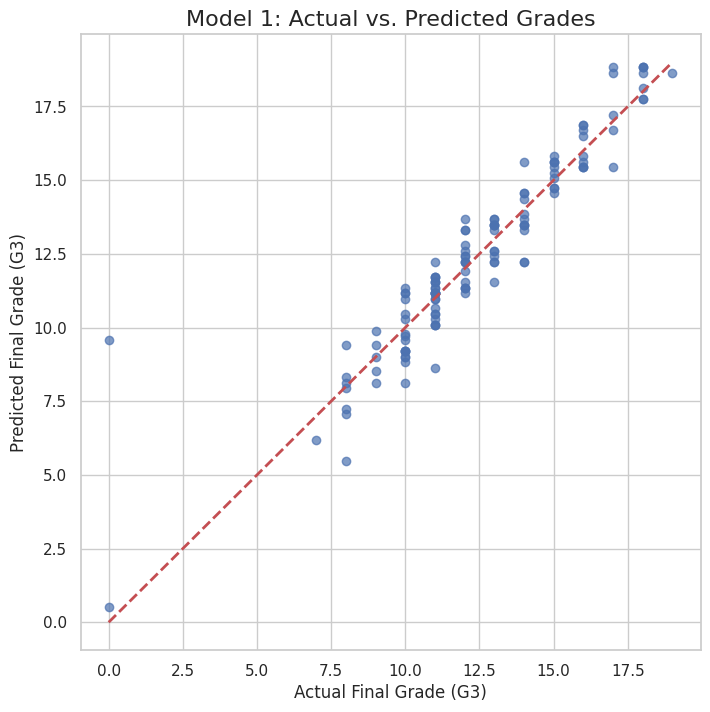

Observation: The dots are very close to the red 'perfect prediction' line.


In [7]:
# ==============================================================================
# --- STEP 5: MODEL 1 - "THE TRACKER" (Predict G3 with G1 & G2) ---
# ==============================================================================
print("\n--- Building Model 1 (The 'Tracker') ---")

# --- Define Features (X) and Target (y) ---
features_model_1 = ['G1', 'G2']
X1 = df_processed[features_model_1]
y1 = df_processed['G3']

# --- Split the Data (80% train, 20% test) ---
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# --- Train the Linear Regression Model ---
print("Training Linear Regression...")
model_1 = LinearRegression()
model_1.fit(X1_train, y1_train)

# --- Make Predictions & Evaluate ---
y1_pred = model_1.predict(X1_test)
r2_1 = r2_score(y1_test, y1_pred)
mae_1 = mean_absolute_error(y1_test, y1_pred)

print(f"\n--- Model 1 Results ---")
print(f"  R-squared (R2): {r2_1:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_1:.4f}")
print(f"  (Model 1 is ~{r2_1*100:.1f}% accurate)")

# --- VISUALIZE Model 1 Results ---
plt.figure(figsize=(8, 8))
plt.scatter(y1_test, y1_pred, alpha=0.7)
plt.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'r--', lw=2) # Perfect prediction line
plt.title('Model 1: Actual vs. Predicted Grades', fontsize=16)
plt.xlabel('Actual Final Grade (G3)', fontsize=12)
plt.ylabel('Predicted Final Grade (G3)', fontsize=12)
plt.show()
print("Observation: The dots are very close to the red 'perfect prediction' line.")

In [8]:
# ==============================================================================
# --- STEP 6: MODEL 2 - "THE PREDICTOR" (Realistic Scenario) ---
# ==============================================================================
print("\n--- Building Model 2 (The 'Predictor') ---")

# --- Define Features (X) and Target (y) ---
# We use EVERYTHING except the grades
features_model_2 = df_processed.drop(['G3', 'G1', 'G2'], axis=1)
X2 = features_model_2
y2 = df_processed['G3']

# --- Split the Data ---
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Explicitly create copies to avoid the SettingWithCopyWarning
X2_train = X2_train.copy()
X2_test = X2_test.copy()
# --- END OF FIX ---

# --- Scale the Data ---
print("Scaling numerical features for Model 2...")
# Identify original numerical columns (excluding grades and new dummy columns)
original_num_cols = df.select_dtypes(include=np.number).drop(['G1','G2','G3'], axis=1).columns

scaler = StandardScaler()
X2_train[original_num_cols] = scaler.fit_transform(X2_train[original_num_cols])
X2_test[original_num_cols] = scaler.transform(X2_test[original_num_cols])
print(" Features scaled.")

print("--- Model 2 Data Scaled Successfully ---")
print(X2_train.head())


--- Building Model 2 (The 'Predictor') ---
Scaling numerical features for Model 2...
 Features scaled.
--- Model 2 Data Scaled Successfully ---
          age      Medu      Fedu  traveltime  studytime  failures    famrel  \
332  0.987932 -0.437418 -0.256337   -0.754310   1.352962 -0.382133  0.068136   
29  -0.629534  1.350140  1.591423   -0.754310   0.121054 -0.382133  0.068136   
302  0.987932  0.456361 -0.256337   -0.754310   1.352962 -0.382133  1.108214   
286  0.179199 -0.437418 -1.180216   -0.754310  -1.110853 -0.382133  0.068136   
554  0.179199 -1.331196 -1.180216    0.555011  -1.110853 -0.382133 -0.971942   

     freetime     goout      Dalc  ...  guardian_mother  guardian_other  \
332 -0.186680 -0.196270 -0.539674  ...             True           False   
29   0.753970  1.501468  3.579309  ...             True           False   
302 -0.186680 -1.045139 -0.539674  ...             True           False   
286  0.753970 -1.045139  0.490072  ...             True           False   

--- Training Model 2 (Random Forest) ---
Model 2 R-squared (R2): 0.1740
Model 2 Mean Absolute Error (MAE): 2.0651

Analysis: An R2 of 0.1740 is much lower than Model 1, which is expected.
An MAE of 2.0651 means our predictions are off by ~2.0651 grade points, which is still useful.


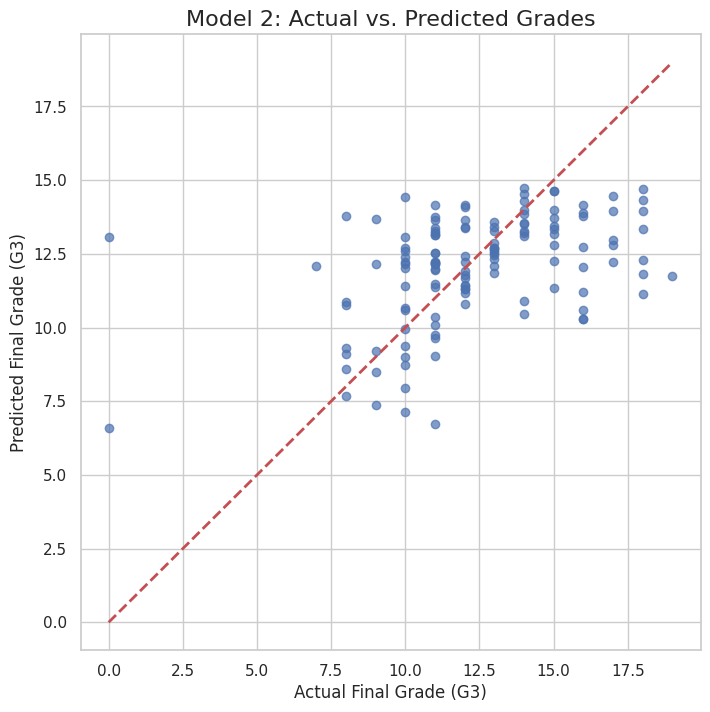

Observation: The predictions are much more scattered than Model 1. This shows it's a harder problem.


In [9]:
# --- Train the Random Forest Model ---
print("--- Training Model 2 (Random Forest) ---")
# n_estimators = number of "trees" in the forest
model_2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_2.fit(X2_train, y2_train)

# --- Make Predictions & Evaluate ---
y2_pred = model_2.predict(X2_test)
r2_2 = r2_score(y2_test, y2_pred)
mae_2 = mean_absolute_error(y2_test, y2_pred)

print(f"Model 2 R-squared (R2): {r2_2:.4f}")
print(f"Model 2 Mean Absolute Error (MAE): {mae_2:.4f}")
print(f"\nAnalysis: An R2 of {r2_2:.4f} is much lower than Model 1, which is expected.")
print(f"An MAE of {mae_2:.4f} means our predictions are off by ~{mae_2:.4f} grade points, which is still useful.")

# --- VISUALIZE Model 2 Results ---
plt.figure(figsize=(8, 8))
plt.scatter(y2_test, y2_pred, alpha=0.7)
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'r--', lw=2) # Perfect prediction line
plt.title('Model 2: Actual vs. Predicted Grades', fontsize=16)
plt.xlabel('Actual Final Grade (G3)', fontsize=12)
plt.ylabel('Predicted Final Grade (G3)', fontsize=12)
plt.show()
print("Observation: The predictions are much more scattered than Model 1. This shows it's a harder problem.")

--- Top 20 Most Important Features (Model 2) ---
          feature  importance
5        failures    0.206755
12       absences    0.072141
13      school_MS    0.049586
2            Fedu    0.049477
9            Dalc    0.042123
10           Walc    0.040857
7        freetime    0.036611
0             age    0.035768
8           goout    0.034317
11         health    0.033526
1            Medu    0.033290
36     higher_yes    0.030943
4       studytime    0.030323
31  schoolsup_yes    0.027606
6          famrel    0.022819
3      traveltime    0.018652
27   reason_other    0.017814
32     famsup_yes    0.016540
14          sex_M    0.014009
35    nursery_yes    0.013964


/tmp/ipython-input-3355555190.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')


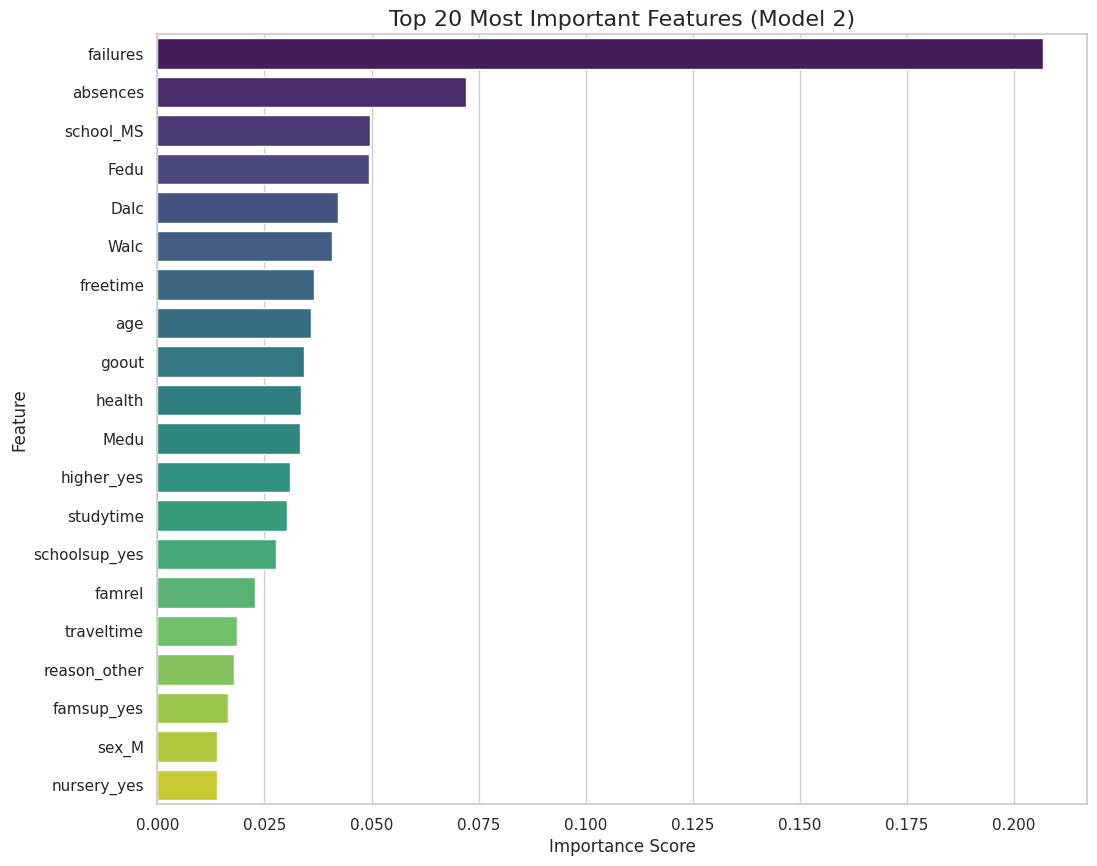

In [10]:
# --- Get Feature Importances ---
importances = model_2.feature_importances_
feature_names = X2.columns

# --- Create a DataFrame for plotting ---
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# --- Display Top 20 Most Important Features ---
print("--- Top 20 Most Important Features (Model 2) ---")
print(feature_importance_df.head(20))

# --- Plot the Top 20 Features ---
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Most Important Features (Model 2)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [11]:
# ==============================================================================
# --- STEP 9: FINAL CONCLUSION & INSIGHTS ---
# ==============================================================================
print("\n--- FINAL PROJECT CONCLUSION ---")

# --- Model Performance Summary ---
print("\n--- Model Performance Summary ---")
print(f"1. Model 1 ('Tracker'):")
print(f"   - R-Squared: {r2_1:.4f}")
print(f"   - This model was ~{r2_1*100:.1f}% accurate at predicting final grades using G1 and G2.")
print(f"   - This confirms that recent performance is the best predictor of immediate future performance.")

print(f"\n2. Model 2 ('Predictor'):")
print(f"   - R-Squared: {r2_2:.4f}")
print(f"   - This model was ~{r2_2*100:.1f}% accurate at predicting final grades using *only* background and behavior data.")
print(f"   - While less accurate, this model is more useful for early intervention, as it doesn't require prior grades.")

# --- Key Predictors of Success ---
print("\n--- Key Predictors of Success (from Model 2) ---")
print(f"The most important factors for predicting a student's final grade *before* they take any tests are:")

# Get the top 3 features dynamically from the 'feature_importance_df'
top_3_features = feature_importance_df.head(3)
print(f"   1. {top_3_features.iloc[0]['feature']} (Importance: {top_3_features.iloc[0]['importance']:.3f})")
print(f"   2. {top_3_features.iloc[1]['feature']} (Importance: {top_3_features.iloc[1]['importance']:.3f})")
print(f"   3. {top_3_features.iloc[2]['feature']} (Importance: {top_3_features.iloc[2]['importance']:.3f})")

# --- Actionable Insights ---
print("\n--- Actionable Insights ---")
print(f"1. Focus on 'failures': The data shows that past failures ('{top_3_features.iloc[0]['feature']}') are the single biggest predictor.")
print("   -> Recommendation: Schools should immediately flag students with 1 or more past failures for extra academic support and counseling.")

print(f"\n2. Monitor 'absences': The number of absences ('{top_3_features.iloc[1]['feature']}') is the next most critical factor.")
print("   -> Recommendation: An early-warning system for attendance (e.g., > 5 absences) could trigger a meeting with a counselor to find out *why* the student is missing class.")

print("\n--- Project Credits ---")
print("Project made by:")
print("Ayush Sawhney (A2305224470)")
print("Akshat Tyagi (A2305224342)")

print("\n--- PROJECT COMPLETE ---")


--- FINAL PROJECT CONCLUSION ---

--- Model Performance Summary ---
1. Model 1 ('Tracker'):
   - R-Squared: 0.8599
   - This model was ~86.0% accurate at predicting final grades using G1 and G2.
   - This confirms that recent performance is the best predictor of immediate future performance.

2. Model 2 ('Predictor'):
   - R-Squared: 0.1740
   - This model was ~17.4% accurate at predicting final grades using *only* background and behavior data.
   - While less accurate, this model is more useful for early intervention, as it doesn't require prior grades.

--- Key Predictors of Success (from Model 2) ---
The most important factors for predicting a student's final grade *before* they take any tests are:
   1. failures (Importance: 0.207)
   2. absences (Importance: 0.072)
   3. school_MS (Importance: 0.050)

--- Actionable Insights ---
1. Focus on 'failures': The data shows that past failures ('failures') are the single biggest predictor.
   -> Recommendation: Schools should immediately